In [117]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os, sys

sys.path.insert(0,'../scripts/tools_for_VAE/')
import tools_for_VAE
from tools_for_VAE import utils, plot

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import warnings
warnings.filterwarnings("ignore")

In [118]:
%run ../scripts/Images_generation/cosmos_generation.py

In [119]:
data_dir = '../images/blended/test'
root = 'galaxies_blended_20191001'

In [120]:
dfs = []
for i in range(1):
    dfs.append(pd.read_csv(os.path.join(data_dir, root+'_{}_data.csv'.format(i))))
df = dfs[0]
for df2 in dfs[1:]:
    df = df.append(df2)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
nb_blended_gal                500 non-null int64
SNR                           500 non-null float64
SNR_peak                      500 non-null float64
redshift                      500 non-null float64
moment_sigma                  500 non-null float64
e1                            500 non-null float64
e2                            500 non-null float64
mag                           500 non-null float64
closest_x                     500 non-null float64
closest_y                     500 non-null float64
closest_redshift              500 non-null float64
closest_moment_sigma          500 non-null float64
closest_e1                    500 non-null float64
closest_e2                    500 non-null float64
closest_mag                   500 non-null float64
blendedness_total_lsst        381 non-null float64
blendedness_total_euclid      381 non-null float64
blendedness_closest_lsst      

In [122]:
df.head()

,nb_blended_gal,SNR,SNR_peak,redshift,moment_sigma,e1,e2,mag,closest_x,closest_y,closest_redshift,closest_moment_sigma,closest_e1,closest_e2,closest_mag,blendedness_total_lsst,blendedness_total_euclid,blendedness_closest_lsst,blendedness_closest_euclid
0,2,50.023899,0.088206,3.0140,1.624927,0.670954,0.576229,26.448832,1.102042,0.281749,0.7595,2.633502,0.063476,0.607384,27.158435,0.060756,0.035064,0.251659,0.075144
1,4,27.804683,0.038897,1.5041,2.071619,0.486584,0.313596,26.838525,1.172265,0.794479,0.8495,1.924292,-0.356023,0.572435,28.402564,0.063188,0.015131,0.145711,0.020004
2,2,13.022800,0.018277,1.7885,2.131886,-0.341106,0.747327,27.593085,0.297296,1.186906,1.1236,1.838381,-0.818363,0.318243,28.218694,0.136465,0.050082,0.238025,0.071445
3,3,316.179685,0.474991,0.3062,2.222467,-0.336952,0.123042,23.962460,-0.919617,0.222197,0.8071,1.598137,-0.574919,0.114939,27.551015,0.014795,0.006793,0.209180,0.026194
4,2,24.656635,0.035689,0.4666,2.025828,-0.477261,-0.316395,26.962793,-0.459920,0.573475,0.9052,1.971810,0.187837,0.957161,27.075081,0.277201,0.204845,0.410527,0.123613


In [123]:
df.describe()

,nb_blended_gal,SNR,SNR_peak,redshift,moment_sigma,e1,e2,mag,closest_x,closest_y,closest_redshift,closest_moment_sigma,closest_e1,closest_e2,closest_mag,blendedness_total_lsst,blendedness_total_euclid,blendedness_closest_lsst,blendedness_closest_euclid
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,381.000000,381.000000,381.000000,381.000000
mean,2.506000,104.049230,0.162024,0.960827,2.116877,0.012175,-0.017250,26.137787,-0.000869,-0.004262,1.126719,1.892633,0.051702,0.010136,27.325309,0.112040,0.069293,0.290512,0.117714
std,1.101085,213.668496,0.437401,0.721490,0.493821,0.438075,0.430723,1.375813,0.724773,0.751253,0.716740,0.311668,0.533345,0.466925,0.885236,0.109951,0.112030,0.256900,0.175593
min,1.000000,3.178277,0.004250,0.043700,1.525966,-0.934998,-0.944689,20.448996,-1.777382,-1.869422,0.040600,1.504908,-1.126538,-1.978568,23.160606,0.000667,0.000015,0.005395,0.000060
25%,2.000000,23.034497,0.034644,0.452000,1.771391,-0.321658,-0.328009,25.329808,-0.402018,-0.467137,0.642250,1.676766,-0.354270,-0.346207,26.938549,0.025203,0.004428,0.067612,0.007257
50%,3.000000,38.968495,0.056993,0.784650,1.999657,-0.016320,-0.011183,26.445229,0.000000,0.000000,0.958650,1.808375,0.035570,0.029232,27.437115,0.070977,0.018712,0.220436,0.040719
75%,3.000000,86.773360,0.116552,1.196875,2.289464,0.350399,0.270702,27.089175,0.382263,0.450741,1.413425,2.022240,0.434624,0.367356,27.846786,0.163072,0.085246,0.440849,0.155264
max,4.000000,2575.257526,7.716877,3.941200,4.967400,1.089026,0.966053,29.365147,1.855858,1.977519,3.995500,3.284524,3.661572,0.990508,29.668482,0.507400,0.594220,0.967459,0.862473


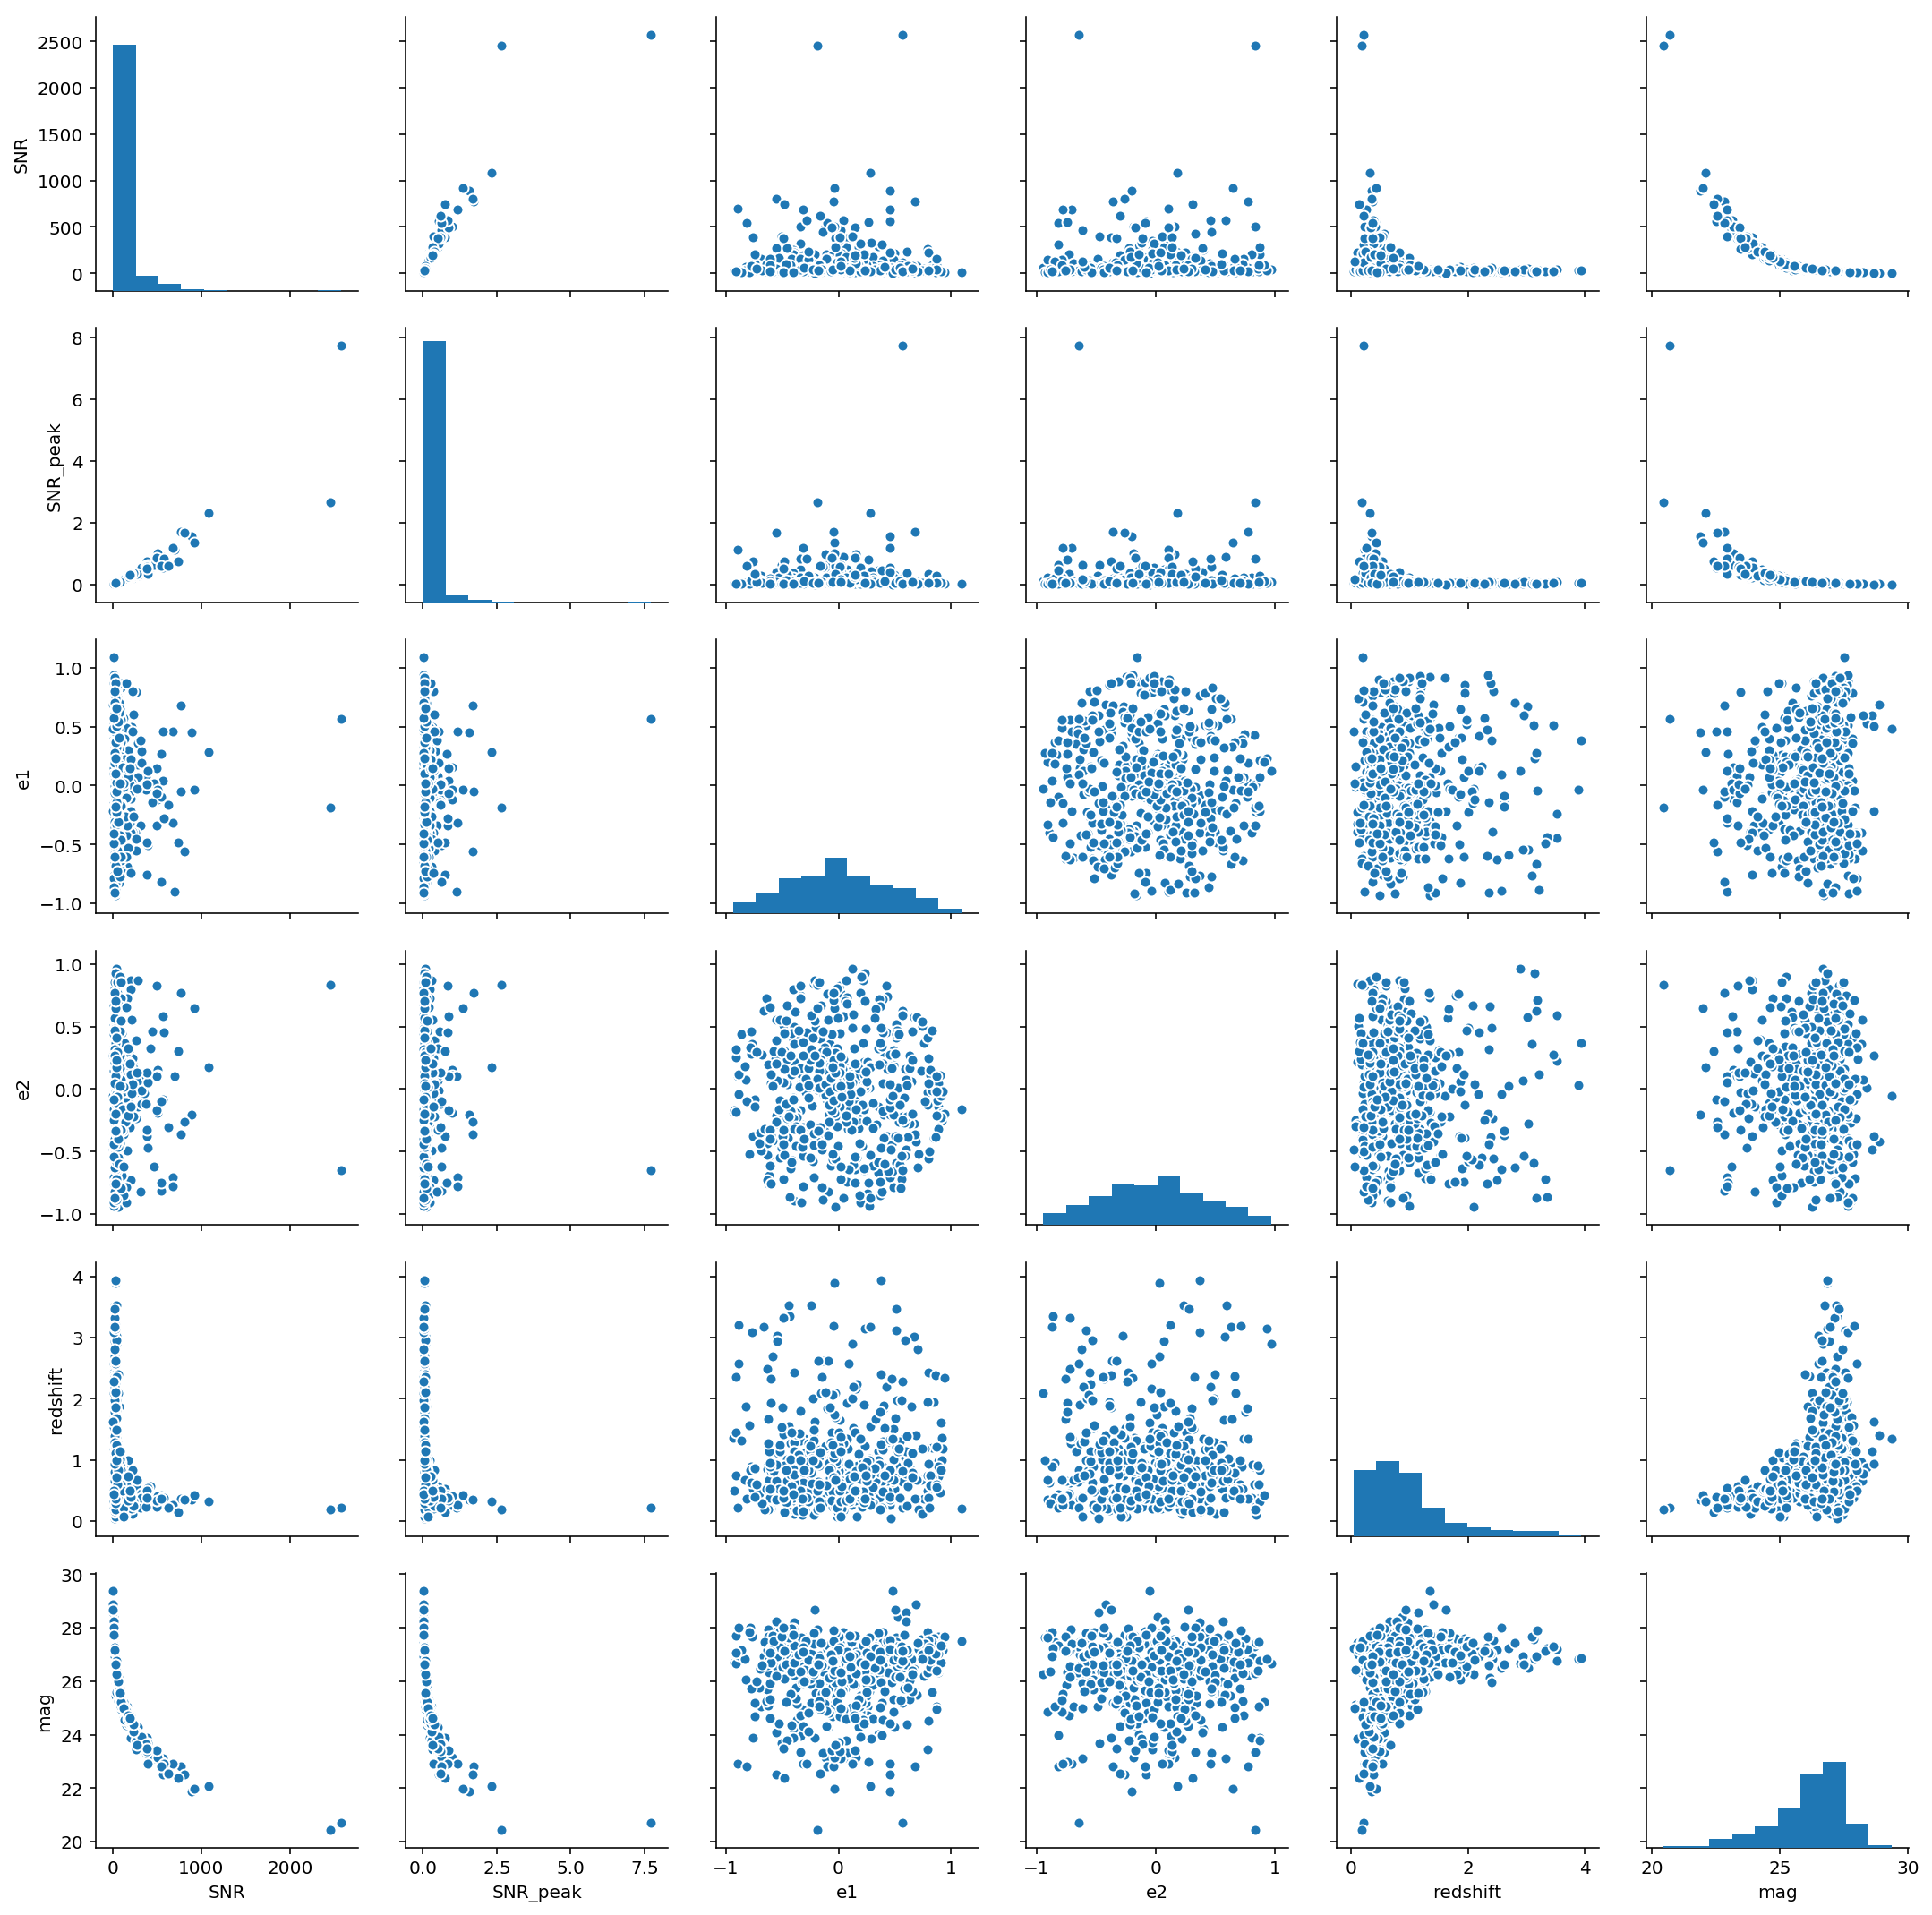

In [124]:
sns.pairplot(df, vars=['SNR', 'SNR_peak', 'e1', 'e2', 'redshift', 'mag'])

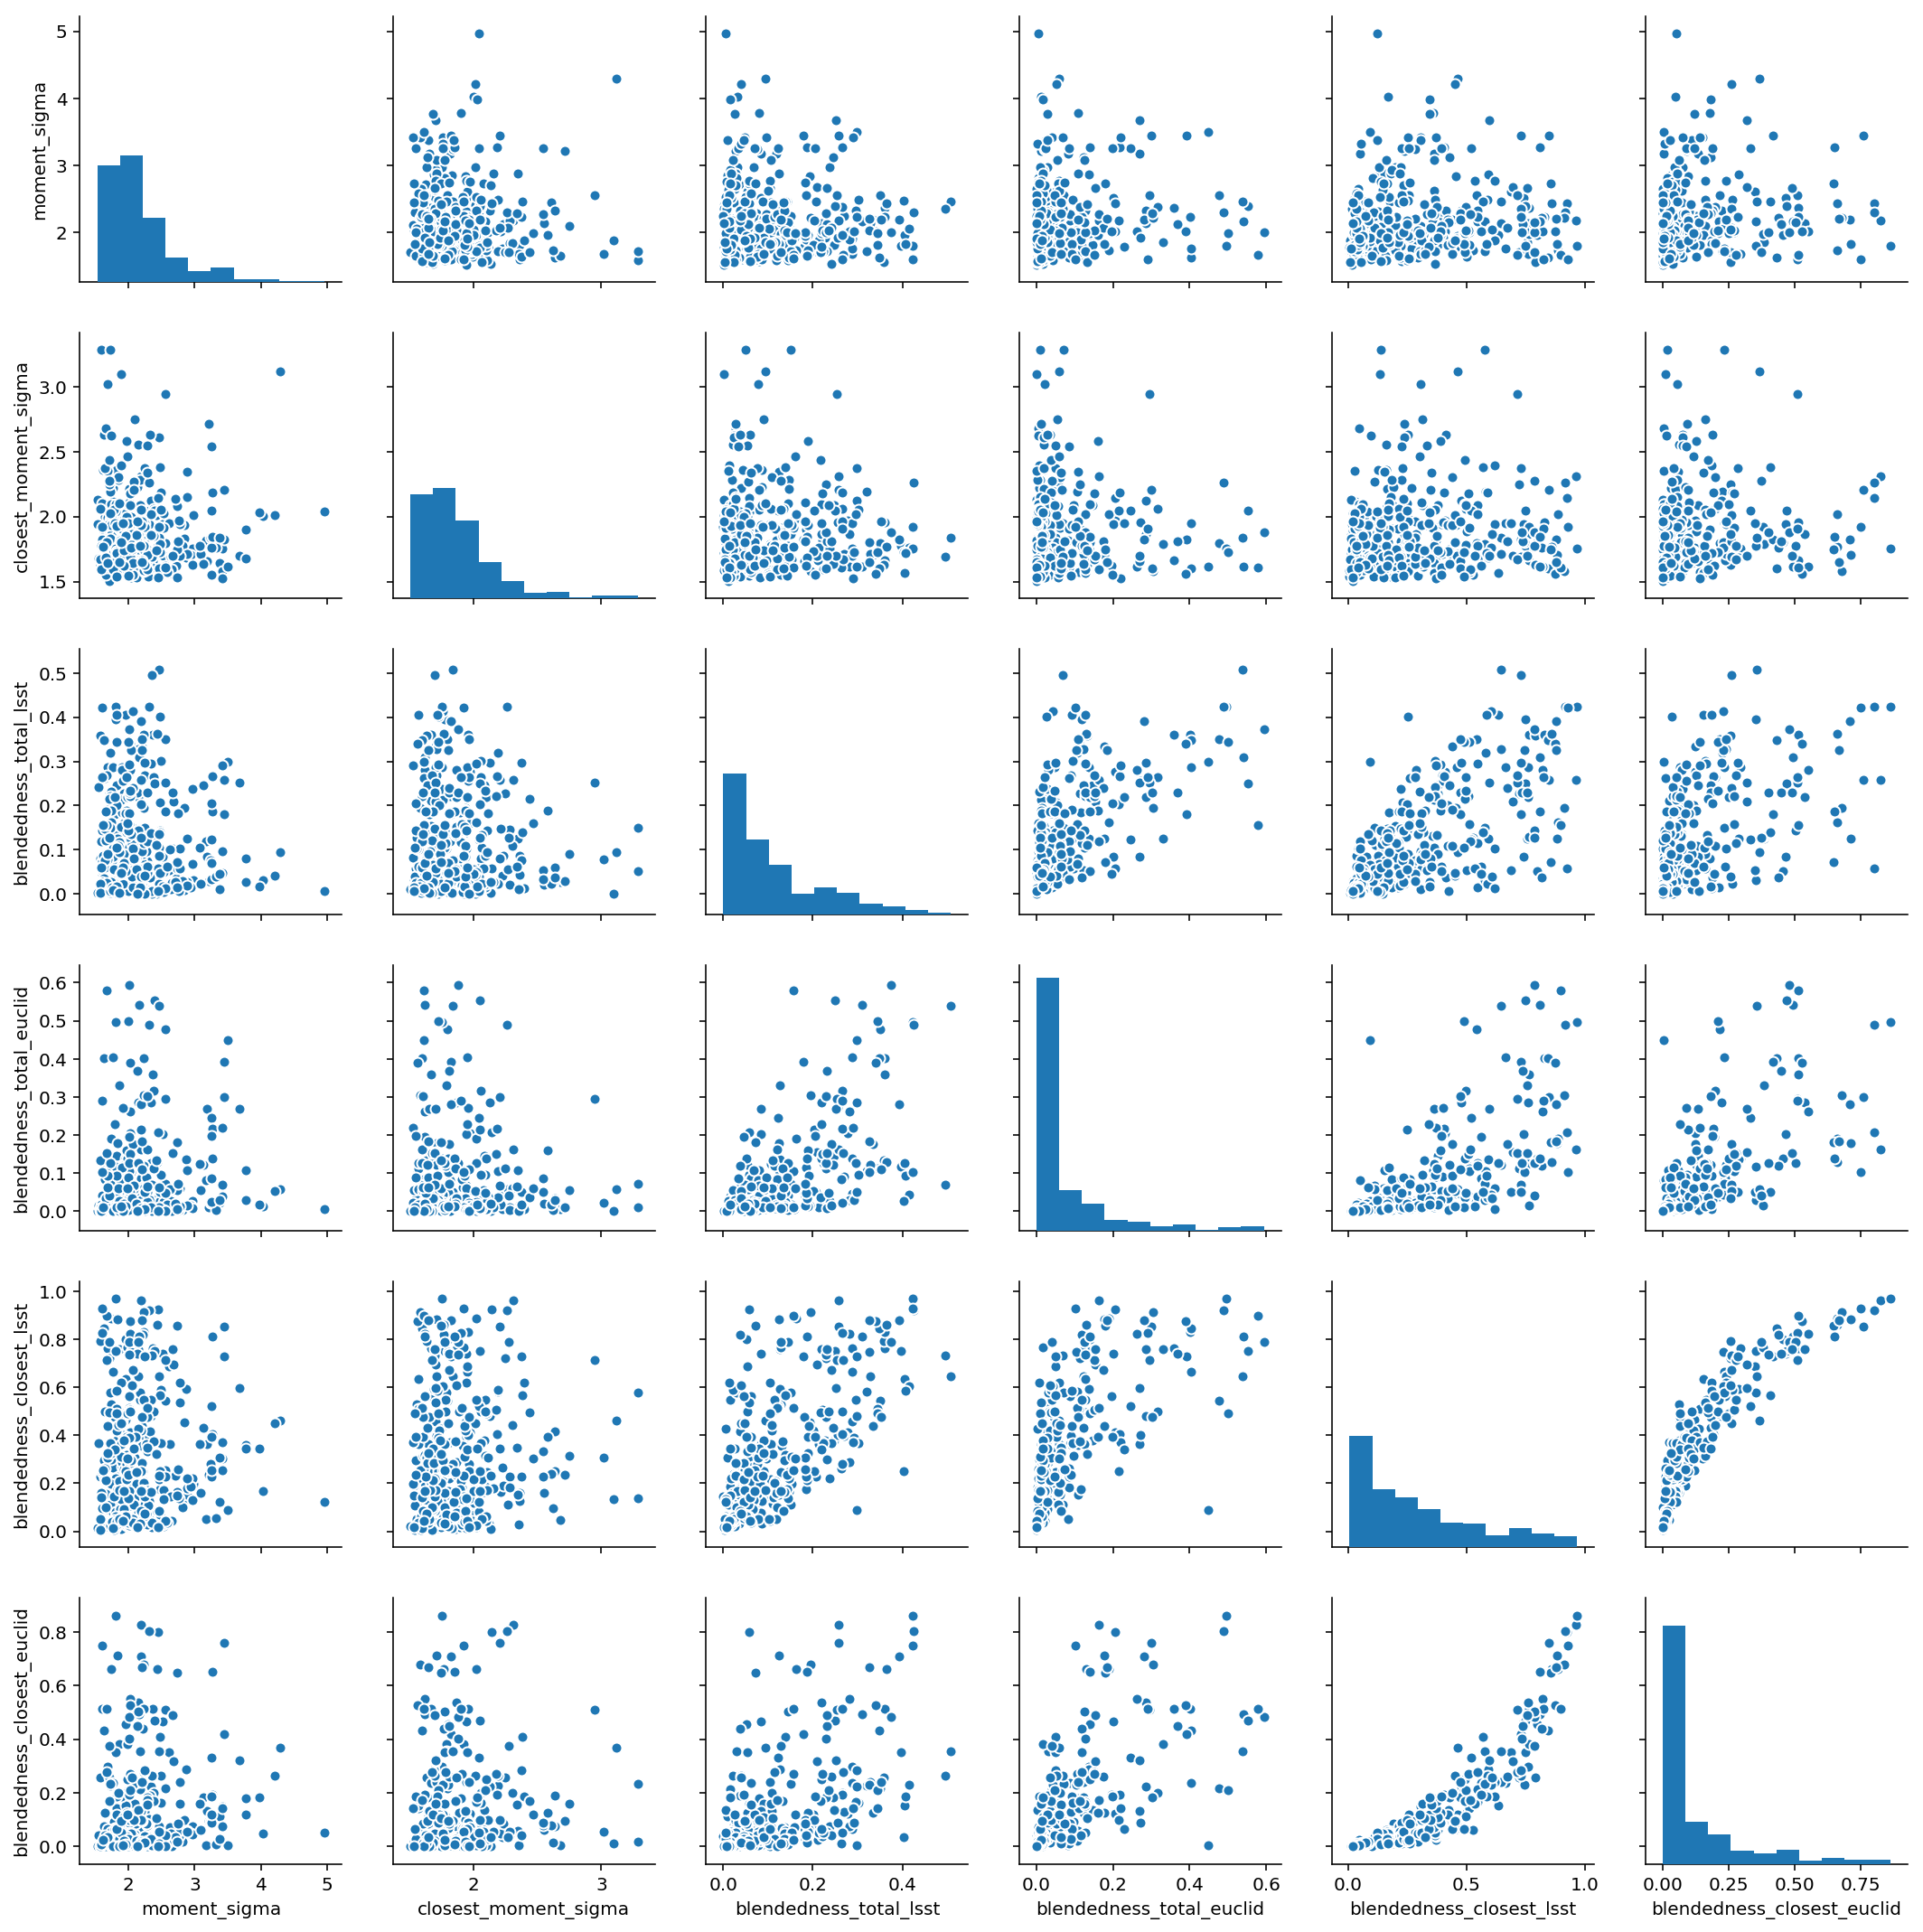

In [125]:
sns.pairplot(data=df.dropna(), vars=['moment_sigma', 'closest_moment_sigma', 'blendedness_total_lsst', 'blendedness_total_euclid', 'blendedness_closest_lsst', 'blendedness_closest_euclid'])

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'SNR')

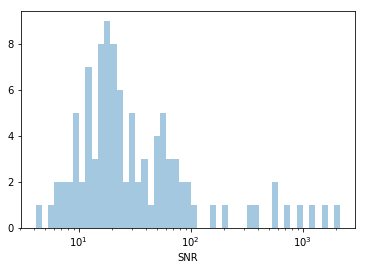

In [10]:
sns.distplot(df['SNR'], bins=np.geomspace(np.min(df['SNR']), np.max(df['SNR']), 50), kde=False)
plt.xscale('log')
plt.xlabel('SNR')

In [4]:
i = 0
galaxies = np.load(os.path.join(data_dir, root+'_{}_images.npy'.format(i)))
_ = utils.norm(galaxies[:,0], bands=range(10), channel_last=False)
_ = utils.norm(galaxies[:,1], bands=range(10), channel_last=False)
shifts = np.load(os.path.join(data_dir, root+'_{}_shifts.npy'.format(i)))

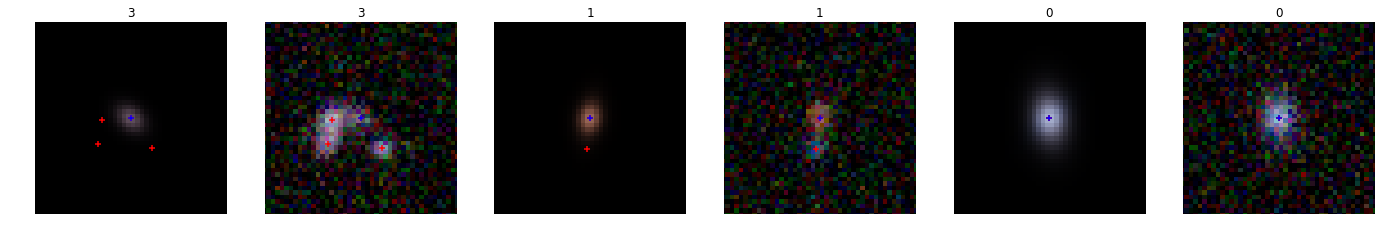

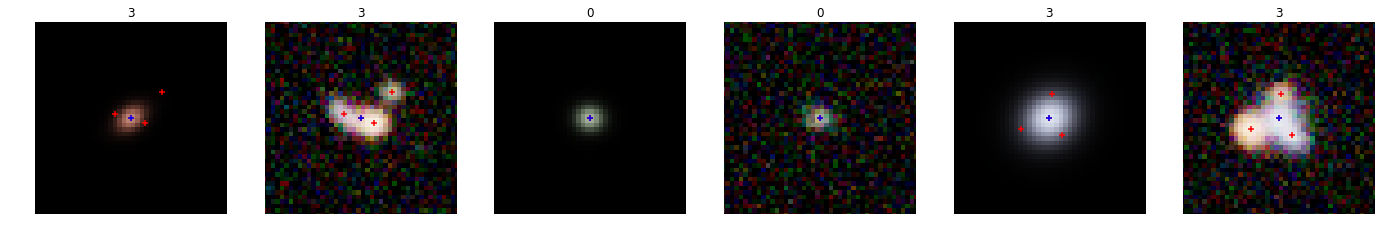

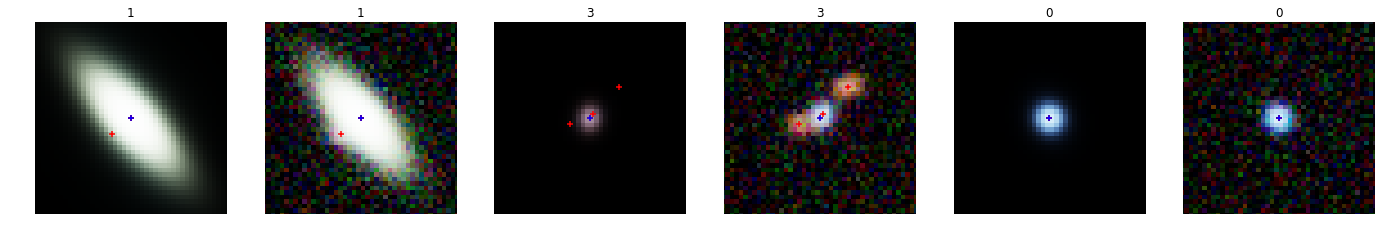

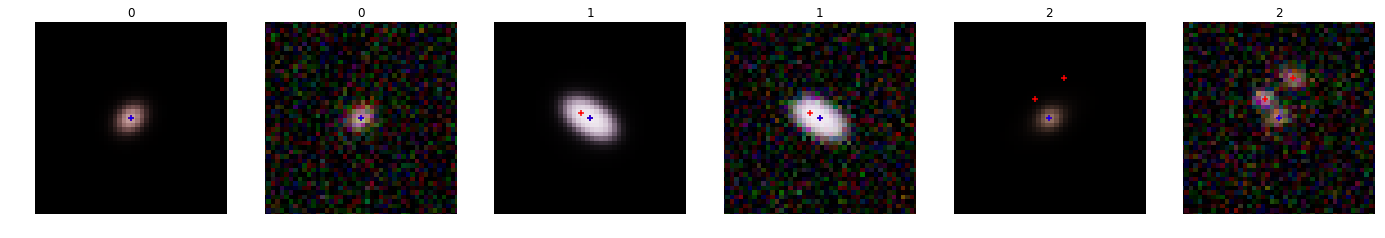

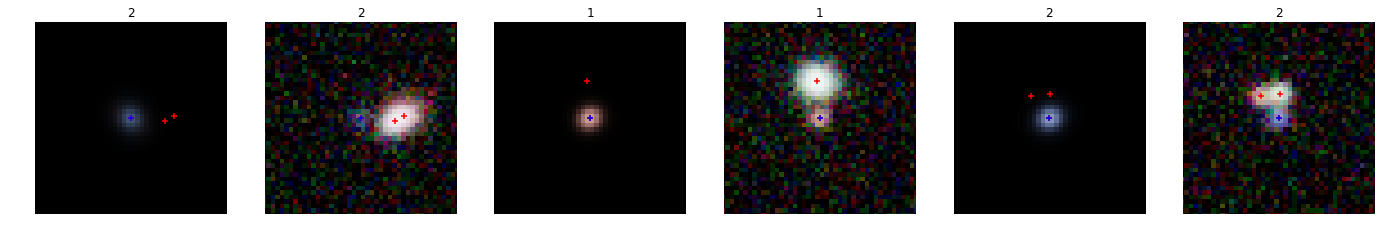

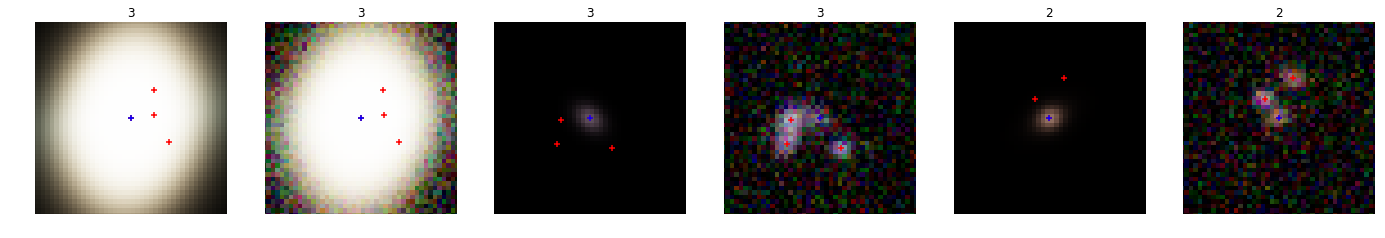

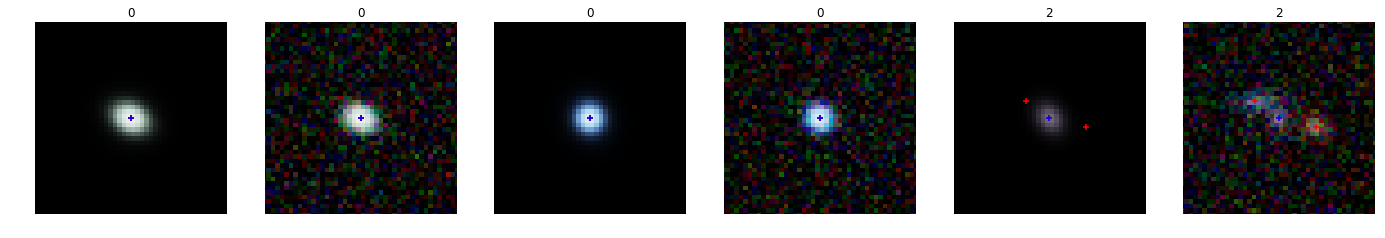

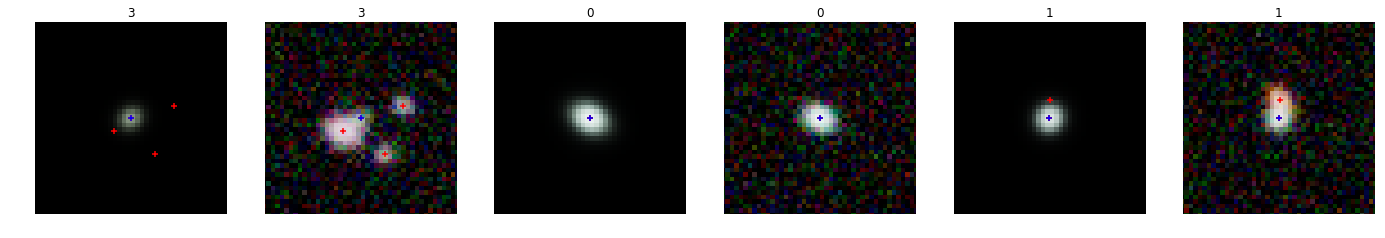

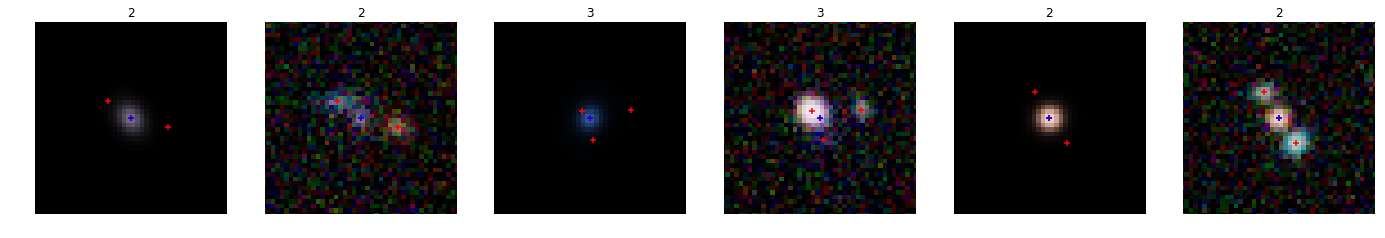

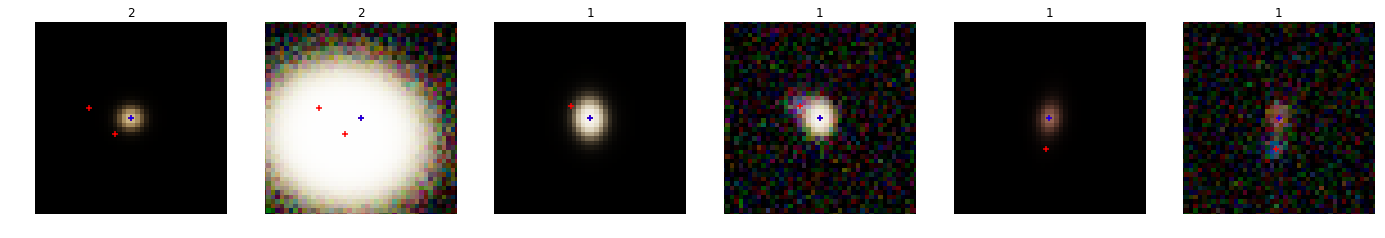

In [5]:
N = 10

for i in range(N):
    fig, axes = plt.subplots(1,6, figsize=(6*4,1*4))
    for j in range(3):
        idx = np.random.choice(range(len(galaxies)))
        for k in range(2):
            ax = axes[j*2+k]
            plot.plot_rgb(galaxies[idx][k], ax=ax, shifts=shifts[idx]/pixel_scale_lsst)
            ax.set_title(str(int(np.sum(shifts[idx]!=0.)/2)))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/home/ubuntu/anacond

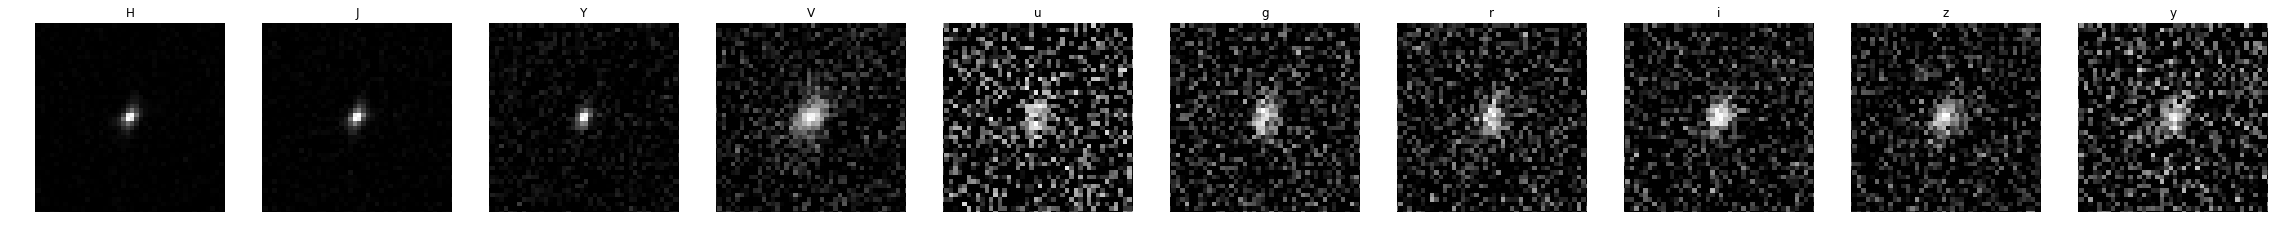

In [8]:
plot.plot_all_bands(galaxies[2,1], band_first=True, cmap=mpl.cm.gray)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/home/ubuntu/anacond

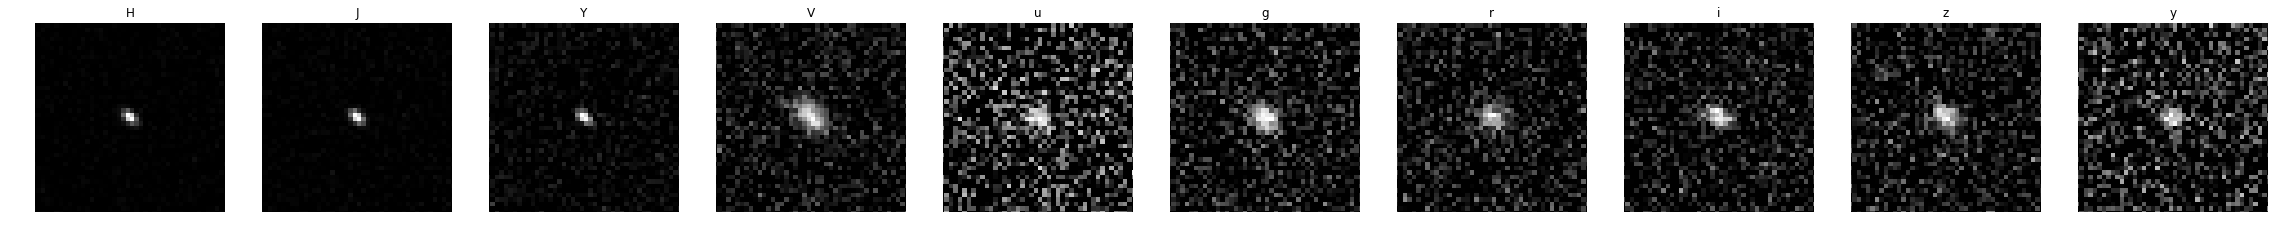

In [7]:
plot.plot_all_bands(galaxies[3,1], band_first=True, cmap=mpl.cm.gray)

In [31]:
galaxies.shape

(1000, 2, 10, 64, 64)

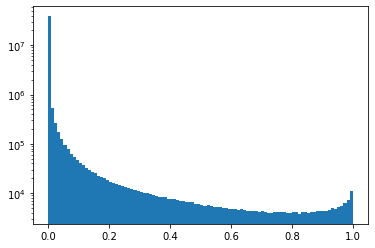

In [35]:
_ = plt.hist(galaxies[:,0].ravel(), 100, log=True)

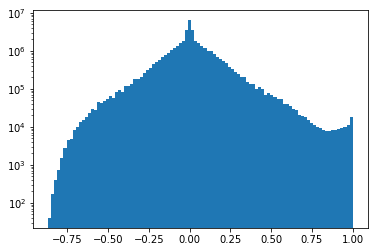

In [34]:
_ = plt.hist(galaxies[:,1].ravel(), 100, log=True)

In [36]:
galaxies = np.load(os.path.join('images/single/test', root+'_{}_images.npy'.format(0)))

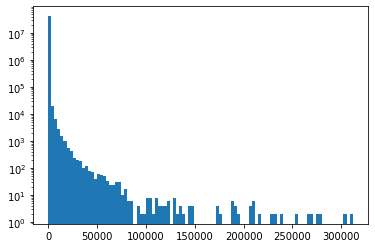

In [37]:
_ = plt.hist(galaxies[:,0].ravel(), 100, log=True)

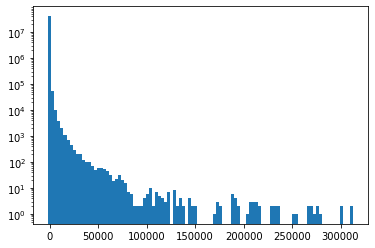

In [38]:
_ = plt.hist(galaxies[:,1].ravel(), 100, log=True)

In [39]:
%pwd

'/home/ubuntu/deblending/Deblender_VAE'

In [42]:
images_dir = '/home/ubuntu/deblending/Deblender_VAE/images/single/'


In [44]:
os.listdir(os.path.join(images_dir,'validation'))

['galaxies_isolated_20190914_0_images.npy',
 'galaxies_isolated_20190914_8_images.npy',
 'galaxies_isolated_20190914_4_images.npy',
 'galaxies_isolated_20190914_16_images.npy',
 'galaxies_isolated_20190914_7_images.npy',
 'galaxies_isolated_20190914_12_images.npy',
 'galaxies_isolated_20190914_11_images.npy',
 'galaxies_isolated_20190914_10_images.npy',
 'galaxies_isolated_20190914_2_images.npy',
 'galaxies_isolated_20190914_6_images.npy',
 'galaxies_isolated_20190914_3_images.npy',
 'galaxies_isolated_20190914_17_images.npy',
 'galaxies_isolated_20190914_1_images.npy',
 'galaxies_isolated_20190914_9_images.npy',
 'galaxies_isolated_20190914_19_images.npy',
 'galaxies_isolated_20190914_5_images.npy',
 'galaxies_isolated_20190914_18_images.npy',
 'galaxies_isolated_20190914_14_images.npy',
 'galaxies_isolated_20190914_13_images.npy',
 'galaxies_isolated_20190914_15_images.npy']

In [46]:
list_of_samples = [os.path.join(images_dir,'training', x) for x in os.listdir(os.path.join(images_dir,'training'))]


In [47]:
list_of_samples

['/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_0_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_8_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_39_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_45_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_59_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_68_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_35_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_34_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_44_images.npy',
 '/home/ubuntu/deblending/Deblender_VAE/images/s

In [58]:
for sample in list_of_samples:
#     print(sample)
    try:
        np.load(sample, mmap_mode='c')
        print(len(np.load(sample, mmap_mode='c')))
    except:
        print(sample)

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
/home/ubuntu/deblending/Deblender_VAE/images/single/training/galaxies_isolated_20190914_72_images.npy
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [57]:
    from tensorflow.keras.callbacks import ReduceLROnPlateau

In [60]:
np.random.randint(100, size=1)

array([30])

In [61]:
a = np.zeros((500, 64, 64, 6))

In [73]:
a[34,:,:,[2]].shape

(1, 64, 64)

In [5]:
import galsim

In [67]:
gal = galsim.Gaussian(0.5)
gal = gal.shear(g1=0.1,g2=0.2)
image = galsim.Image(64, 64)
icentral = gal.drawImage(image=image, scale=0.1)

gal = galsim.Gaussian(0.3) * 0.2
gal = gal.shift(0.75, 0.1)
image = galsim.Image(64, 64)
iclosest = gal.drawImage(image=image, scale=0.1)

gal = galsim.Gaussian(0.2) * 0.2
gal = gal.shift(-1.5, 0.8)
image = galsim.Image(64, 64)
ithird = gal.drawImage(image=image, scale=0.1)

iothers = iclosest + ithird
itot = icentral + iothers

i0 = icentral.array
ic = iclosest.array
io = iothers.array
it = itot.array

In [ ]:
i0*io/np.sum(i0**2)

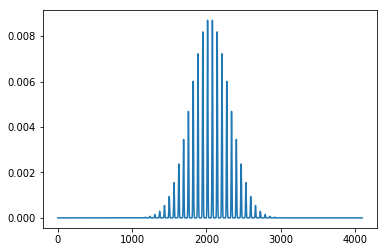

In [103]:
plt.plot(i0.ravel())

In [68]:
isinstance(ithird, galsim.image.Image)

True

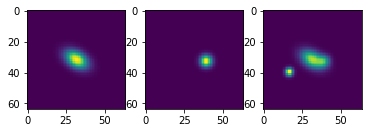

In [70]:
fig, axes = plt.subplots(1,3)
axes[0].imshow(i0)
axes[1].imshow(ic)
axes[2].imshow(it)



In [39]:
from importlib import reload
utils = reload(utils)

In [107]:
print(utils.compute_blendedness_single(icentral, iclosest))
print(utils.compute_blendedness_single(icentral, iothers))
print(utils.compute_blendedness_single(icentral, itot))
print(utils.compute_blendedness_total(icentral, iclosest))
print(utils.compute_blendedness_total(icentral, iothers))

0.33717862
0.18816136
0.88509804
0.10068851709365845
0.10073870420455933


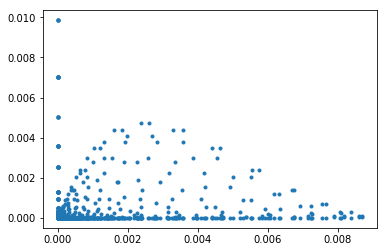

In [41]:
plt.plot(icentral.array.ravel(), iothers.array.ravel(), '.')

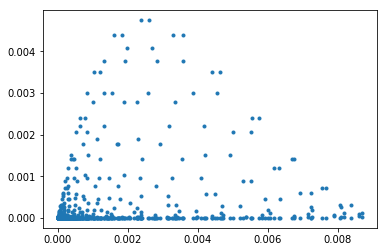

In [43]:
plt.plot(icentral.array.ravel(), iclosest.array.ravel(), '.')

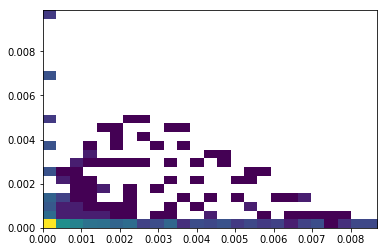

In [45]:
_ = plt.hist2d(icentral.array.ravel(), iothers.array.ravel(), 25, norm=mpl.colors.LogNorm())

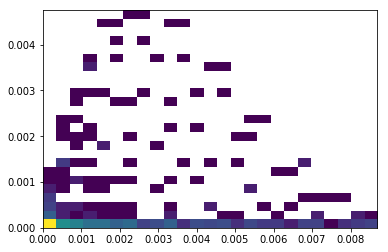

In [46]:
_ = plt.hist2d(icentral.array.ravel(), iclosest.array.ravel(), 25, norm=mpl.colors.LogNorm())

In [62]:
icentral.array.ravel()[:,None].shape

(4096, 1)

In [80]:
np.vstack([i0.ravel(), i0.ravel()]).shape

(2, 4096)

In [92]:
print(mutual_information([i0.ravel()[:,None], i0.ravel()[:,None]], k=500))
print(mutual_information([i0.ravel()[:,None], ic.ravel()[:,None]], k=500))
print(mutual_information([i0.ravel()[:,None], io.ravel()[:,None]], k=500))
print(mutual_information([i0.ravel()[:,None], it.ravel()[:,None]], k=500))

2.1227422055381915
1.0874355146558088
0.9416820265141652
1.8928139355932707


In [102]:
norm = True
s = 0.
print(1.-mutual_information_2d(i0.ravel(), i0.ravel(), sigma=s, normalized=norm))
print(1.-mutual_information_2d(i0.ravel(), ic.ravel(), sigma=s, normalized=norm))
print(1.-mutual_information_2d(i0.ravel(), io.ravel(), sigma=s, normalized=norm))
print(1.-mutual_information_2d(i0.ravel(), it.ravel(), sigma=s, normalized=norm))

1.4654943925052066e-13
0.794149441829703
0.8457438864115692
0.37210342140855035


In [22]:
_ = plt.hist((ic/itot).ravel())

NameError: name 'ic' is not defined

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [88]:
'''
Non-parametric computation of entropy and mutual-information

Adapted by G Varoquaux for code created by R Brette, itself
from several papers (see in the code).

These computations rely on nearest-neighbor statistics

https://gist.github.com/GaelVaroquaux/ead9898bd3c973c40429
'''
import numpy as np

from scipy.special import gamma,psi
from scipy import ndimage
from scipy.linalg import det
from numpy import pi

from sklearn.neighbors import NearestNeighbors

__all__=['entropy', 'mutual_information', 'entropy_gaussian']

EPS = np.finfo(float).eps


def nearest_distances(X, k=1):
    '''
    X = array(N,M)
    N = number of points
    M = number of dimensions

    returns the distance to the kth nearest neighbor for every point in X
    '''
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(X)
    d, _ = knn.kneighbors(X) # the first nearest neighbor is itself
    return d[:, -1] # returns the distance to the kth nearest neighbor


def entropy_gaussian(C):
    '''
    Entropy of a gaussian variable with covariance matrix C
    '''
    if np.isscalar(C): # C is the variance
        return .5*(1 + np.log(2*pi)) + .5*np.log(C)
    else:
        n = C.shape[0] # dimension
        return .5*n*(1 + np.log(2*pi)) + .5*np.log(abs(det(C)))


def entropy(X, k=1):
    ''' Returns the entropy of the X.

    Parameters
    ===========

    X : array-like, shape (n_samples, n_features)
        The data the entropy of which is computed

    k : int, optional
        number of nearest neighbors for density estimation

    Notes
    ======

    Kozachenko, L. F. & Leonenko, N. N. 1987 Sample estimate of entropy
    of a random vector. Probl. Inf. Transm. 23, 95-101.
    See also: Evans, D. 2008 A computationally efficient estimator for
    mutual information, Proc. R. Soc. A 464 (2093), 1203-1215.
    and:
    Kraskov A, Stogbauer H, Grassberger P. (2004). Estimating mutual
    information. Phys Rev E 69(6 Pt 2):066138.
    '''

    # Distance to kth nearest neighbor
    r = nearest_distances(X, k) # squared distances
    n, d = X.shape
    volume_unit_ball = (pi**(.5*d)) / gamma(.5*d + 1)
    '''
    F. Perez-Cruz, (2008). Estimation of Information Theoretic Measures
    for Continuous Random Variables. Advances in Neural Information
    Processing Systems 21 (NIPS). Vancouver (Canada), December.

    return d*mean(log(r))+log(volume_unit_ball)+log(n-1)-log(k)
    '''
    return (d*np.mean(np.log(r + np.finfo(X.dtype).eps))
            + np.log(volume_unit_ball) + psi(n) - psi(k))


def mutual_information(variables, k=1):
    '''
    Returns the mutual information between any number of variables.
    Each variable is a matrix X = array(n_samples, n_features)
    where
      n = number of samples
      dx,dy = number of dimensions

    Optionally, the following keyword argument can be specified:
      k = number of nearest neighbors for density estimation

    Example: mutual_information((X, Y)), mutual_information((X, Y, Z), k=5)
    '''
    if len(variables) < 2:
        raise AttributeError(
                "Mutual information must involve at least 2 variables")
    all_vars = np.hstack(variables)
    return (sum([entropy(X, k=k) for X in variables])
            - entropy(all_vars, k=k))


def mutual_information_2d(x, y, sigma=1, normalized=False):
    """
    Computes (normalized) mutual information between two 1D variate from a
    joint histogram.

    Parameters
    ----------
    x : 1D array
        first variable

    y : 1D array
        second variable

    sigma: float
        sigma for Gaussian smoothing of the joint histogram

    Returns
    -------
    nmi: float
        the computed similariy measure

    """
    bins = (256, 256)

    jh = np.histogram2d(x, y, bins=bins)[0]

    # smooth the jh with a gaussian filter of given sigma
    ndimage.gaussian_filter(jh, sigma=sigma, mode='constant',
                                 output=jh)

    # compute marginal histograms
    jh = jh + EPS
    sh = np.sum(jh)
    jh = jh / sh
    s1 = np.sum(jh, axis=0).reshape((-1, jh.shape[0]))
    s2 = np.sum(jh, axis=1).reshape((jh.shape[1], -1))

    # Normalised Mutual Information of:
    # Studholme,  jhill & jhawkes (1998).
    # "A normalized entropy measure of 3-D medical image alignment".
    # in Proc. Medical Imaging 1998, vol. 3338, San Diego, CA, pp. 132-143.
    if normalized:
        mi = ((np.sum(s1 * np.log(s1)) + np.sum(s2 * np.log(s2)))
                / np.sum(jh * np.log(jh))) - 1
    else:
        mi = ( np.sum(jh * np.log(jh)) - np.sum(s1 * np.log(s1))
               - np.sum(s2 * np.log(s2)))

    return mi



###############################################################################
# Tests

def test_entropy():
    # Testing against correlated Gaussian variables
    # (analytical results are known)
    # Entropy of a 3-dimensional gaussian variable
    rng = np.random.RandomState(0)
    n = 50000
    d = 3
    P = np.array([[1, 0, 0], [0, 1, .5], [0, 0, 1]])
    C = np.dot(P, P.T)
    Y = rng.randn(d, n)
    X = np.dot(P, Y)
    H_th = entropy_gaussian(C)
    H_est = entropy(X.T, k=5)
    # Our estimated entropy should always be less that the actual one
    # (entropy estimation undershoots) but not too much
    np.testing.assert_array_less(H_est, H_th)
    np.testing.assert_array_less(.9*H_th, H_est)


def test_mutual_information():
    # Mutual information between two correlated gaussian variables
    # Entropy of a 2-dimensional gaussian variable
    n = 50000
    rng = np.random.RandomState(0)
    #P = np.random.randn(2, 2)
#     P = np.array([[1, 0], [0.5, 1]])
    P = np.array([[1, 0], [.9, .1]])
    C = np.dot(P, P.T)
    U = rng.randn(2, n)
    Z = np.dot(P, U).T
    X = Z[:, 0]
    X = X.reshape(len(X), 1)
    Y = Z[:, 1]
    Y = Y.reshape(len(Y), 1)
    # in bits
    MI_est = mutual_information((X, Y), k=5)
    MI_th = (entropy_gaussian(C[0, 0])
             + entropy_gaussian(C[1, 1])
             - entropy_gaussian(C)
            )
    # Our estimator should undershoot once again: it will undershoot more
    # for the 2D estimation that for the 1D estimation
    print  (MI_est, MI_th)
    np.testing.assert_array_less(MI_est, MI_th)
    np.testing.assert_array_less(MI_th, MI_est  + .3)


def test_degenerate():
    # Test that our estimators are well-behaved with regards to
    # degenerate solutions
    rng = np.random.RandomState(0)
    x = rng.randn(50000)
    X = np.c_[x, x]
    assert np.isfinite(entropy(X))
    assert np.isfinite(mutual_information((x[:, np.newaxis],
                                           x[:,  np.newaxis])))
    assert 2.9 < mutual_information_2d(x, x) < 3.1


def test_mutual_information_2d():
    # Mutual information between two correlated gaussian variables
    # Entropy of a 2-dimensional gaussian variable
    n = 50000
    rng = np.random.RandomState(0)
    #P = np.random.randn(2, 2)
    P = np.array([[1, 0], [.9, .1]])
    C = np.dot(P, P.T)
    U = rng.randn(2, n)
    Z = np.dot(P, U).T
    X = Z[:, 0]
    X = X.reshape(len(X), 1)
    Y = Z[:, 1]
    Y = Y.reshape(len(Y), 1)
    # in bits
    MI_est = mutual_information_2d(X.ravel(), Y.ravel())
    MI_th = (entropy_gaussian(C[0, 0])
             + entropy_gaussian(C[1, 1])
             - entropy_gaussian(C)
            )
    print  (MI_est, MI_th)
    # Our estimator should undershoot once again: it will undershoot more
    # for the 2D estimation that for the 1D estimation
    np.testing.assert_array_less(MI_est, MI_th)
    np.testing.assert_array_less(MI_th, MI_est  + .2)


In [89]:
test_mutual_information()

1.9523235542990438 2.203359623632126


In [90]:
test_mutual_information_2d()

2.1173231240729757 2.203359623632126
